In [126]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, normalize, scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Task 1

In [217]:
path = '../Data/Regression/'
filename = 'sample_1.csv'

In [218]:
my_data = np.genfromtxt(path + filename, delimiter=',')

In [207]:
X = np.arange(my_data.shape[0])
y = my_data

In [208]:
z = y.copy()
z[z == -np.inf] = 0

In [209]:
y[y == -np.inf] = z.min()

## 1. Visualize the data

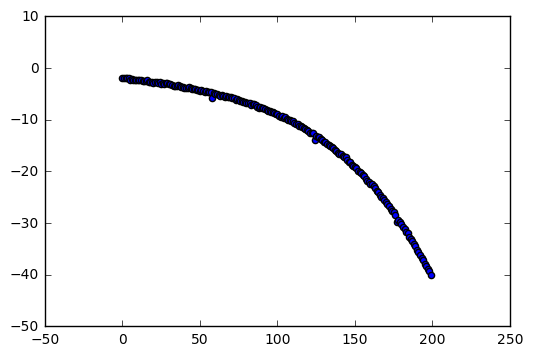

In [210]:
plt.scatter(X, y)
plt.show()

## 2. Perform polynomial regression, try to optimize the degree of the polynomial features.

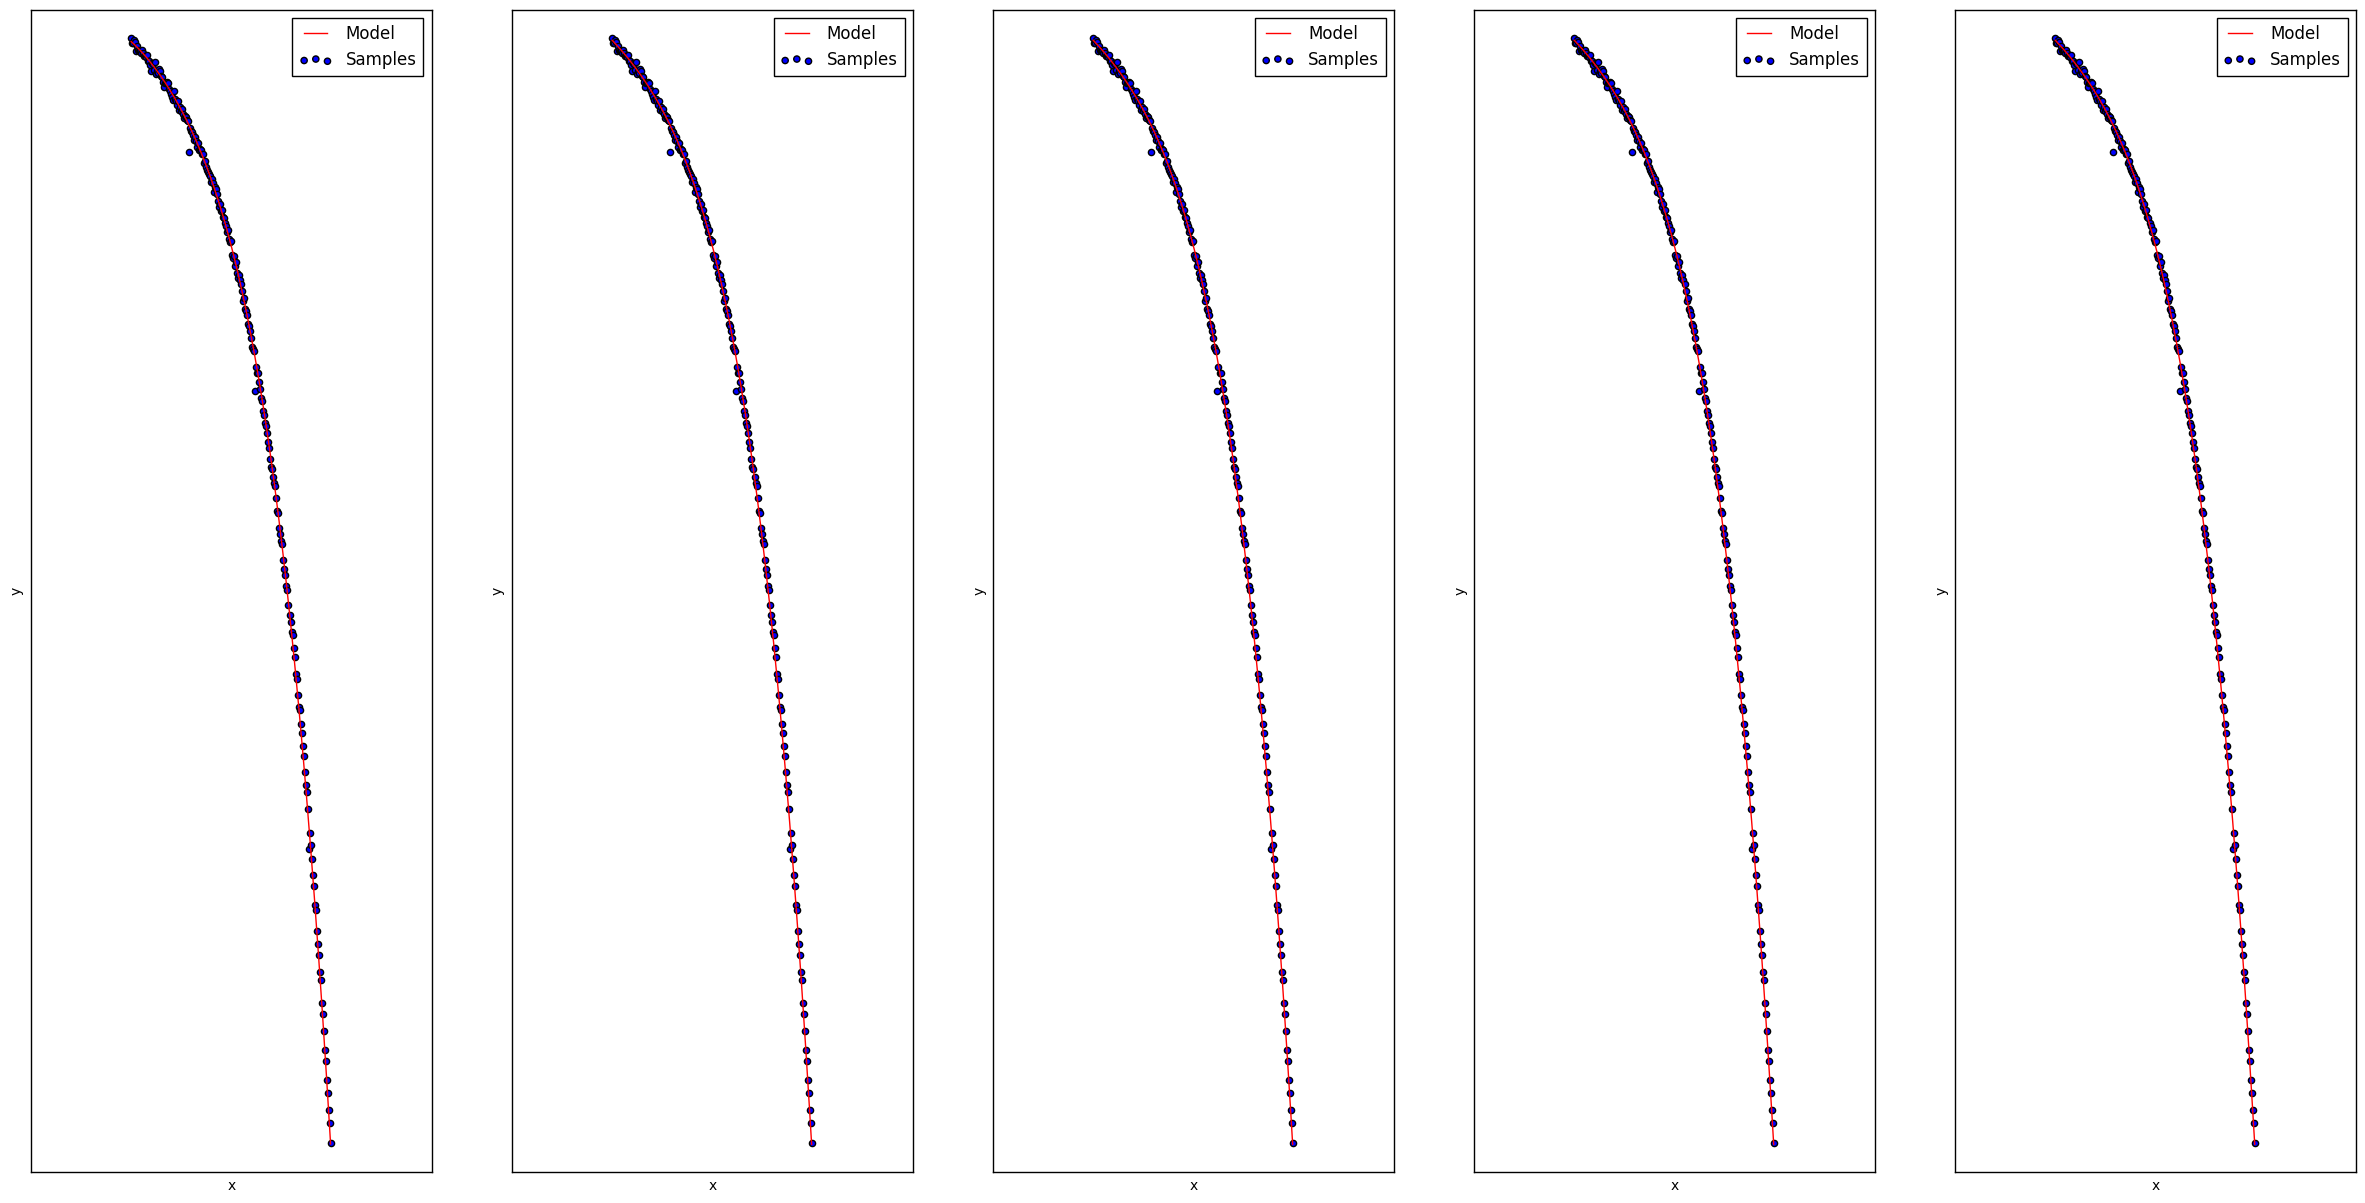

In [211]:
regularization_strength_list = [100, 1, 0.00001, 0.0000001, 0.000000001] #You can change regularization strength here
degree = 5 #You can change degree of the polynomial used for the regression here

plt.figure(figsize=(30, 15))

for i, regularization_strength in enumerate(regularization_strength_list):
    ax = plt.subplot(1, len(regularization_strength_list), i+1 )
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree,
                                             include_bias=False)
    ridge_regression = Ridge(alpha=regularization_strength)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("ridge_regression", ridge_regression)])
    
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    
    X_test = np.arange(y.shape[0])
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model", color='red')
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((-100, y.shape[0] + 100))
    plt.ylim((y.min() - 1, y.max() + 1))
    plt.legend(loc="best")
  
plt.show()

## 3. Evaluate regression results

In [212]:
# The mean squared error
print("Mean squared error: %.2f"
  % np.mean((pipeline.predict(X[:, np.newaxis]) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % pipeline.score(X[:, np.newaxis], y))

Mean squared error: 0.02
Variance score: 1.00


In [213]:
residuals = y - pipeline.predict(X[:, np.newaxis])

In [214]:
residuals = scale(residuals)

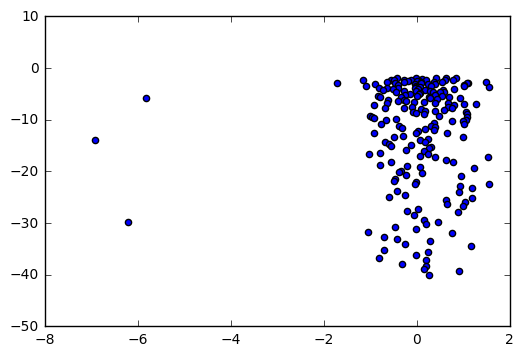

In [215]:
plt.scatter(residuals, y)
plt.show()

In [216]:
scipy.stats.mstats.normaltest(residuals)

NormaltestResult(statistic=194.39227251161748, pvalue=6.1412158451308843e-43)